In [32]:
# Curso 3

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import statsmodels.stats.weightstats as sm


In [34]:
dados_idade_aposentadoria = pd.read_csv("../files/dados_idade_aposentadoria.csv")

dados_vida_lampada = pd.read_csv("../files/dados_vida_lampada.csv")

dados_alturas = pd.read_csv("../files/dados_alturas.csv")


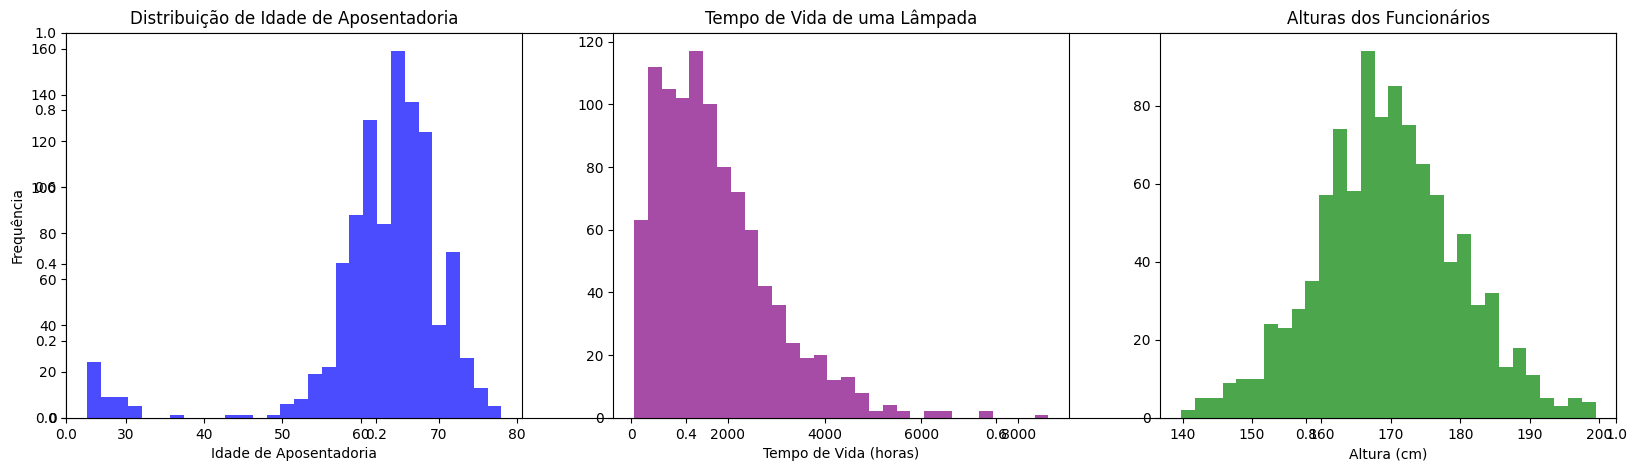

In [35]:
# Várias distribuições
plt.subplots(figsize=(20, 5))
plt.subplot(131)
plt.title('Distribuição de Idade de Aposentadoria')
plt.xlabel('Idade de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(dados_idade_aposentadoria, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(dados_vida_lampada, bins=30, alpha=0.7, color='purple')
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel('Tempo de Vida (horas)')

plt.subplot(133)
plt.hist(dados_alturas, bins=30, alpha=0.7, color='green')
plt.title('Alturas dos Funcionários')
plt.xlabel('Altura (cm)')

plt.show()

In [36]:
n=100 
qnt=100000

def reamostragem_medias(dados, coluna, n, qnt):
    medias = [dados[coluna].sample(n, replace=True).mean()for _ in range(qnt)]
    return medias

In [37]:
media_idade = reamostragem_medias(dados_idade_aposentadoria, 'idade', n , qnt)
media_duracao = reamostragem_medias(dados_vida_lampada, 'duracao', n , qnt)
media_alturas = reamostragem_medias(dados_alturas, 'alturas', n , qnt)


In [38]:
print("***** Médias populacionais *****")

print("idade", dados_idade_aposentadoria['idade'].mean())
print("duracao", dados_vida_lampada['duracao'].mean())
print("altura", dados_alturas['alturas'].mean())

***** Médias populacionais *****
idade 62.70857142857143
duracao 1731.8036029420002
altura 169.52022


In [39]:
def avarage(lst):
    return sum(lst) / len(lst)

print("***** Médias pamostrais *****")

print("idade", avarage(media_idade))
print("duracao", avarage(media_duracao))
print("altura", avarage(media_alturas))


***** Médias pamostrais *****
idade 62.71193319999926
duracao 1731.7259870242808
altura 169.52323983099845


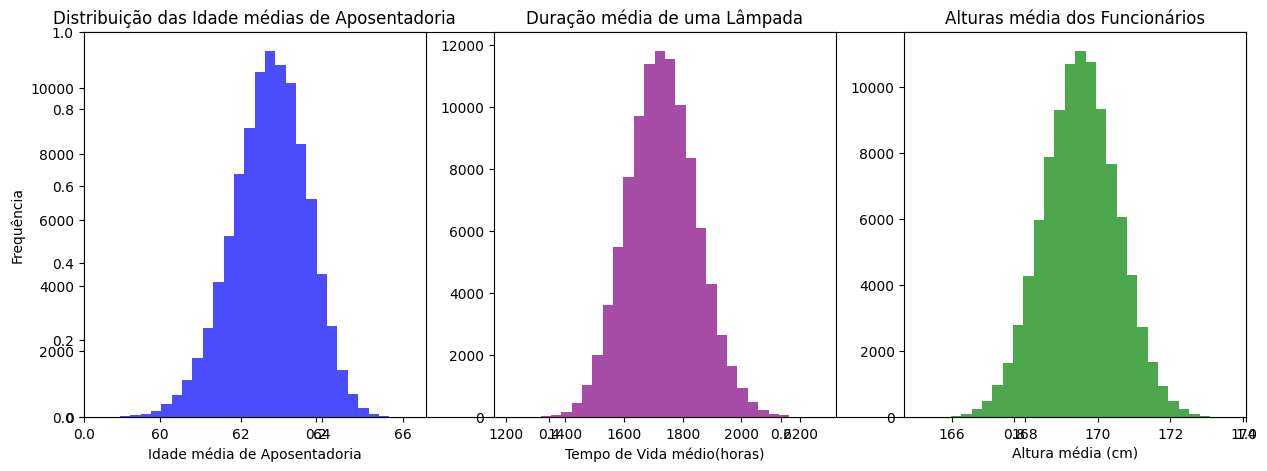

In [40]:
plt.subplots(figsize=(15, 5))
plt.subplot(131)
plt.title('Distribuição das Idade médias de Aposentadoria')
plt.xlabel('Idade média de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(media_idade, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')

plt.subplot(133)
plt.hist(media_alturas, bins=30, alpha=0.7, color='green')
plt.title('Alturas média dos Funcionários')
plt.xlabel('Altura média (cm)')

plt.show()

In [41]:
media_nova_amostra = 1200

In [42]:
dados_vida_lampada['duracao'].mean()

np.float64(1731.8036029420002)

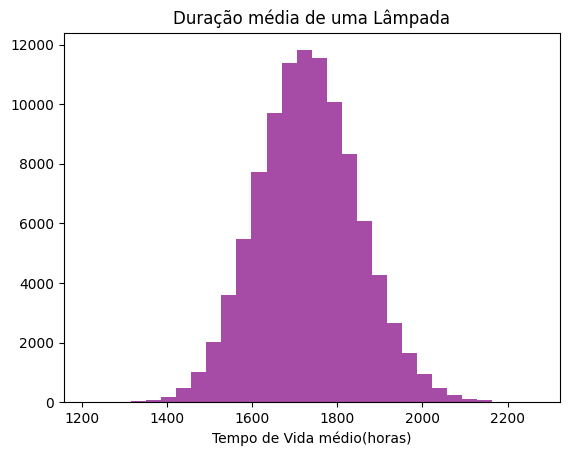

In [43]:
# Quão distante essa média está do comportamento?

plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')
plt.show()

In [44]:
duracao_amostras = pd.DataFrame({'medias_duracao': media_duracao})

In [45]:
media_das_medias = duracao_amostras['medias_duracao'].mean()
EP = duracao_amostras['medias_duracao'].std()

print("*****  Medidas amostrais *****")
print("média:", media_das_medias )
print("Erro Padrão:", EP )

*****  Medidas amostrais *****
média: 1731.7259870242783
Erro Padrão: 118.11279823632151


In [46]:
1732 - 3*EP

np.float64(1377.6616052910354)

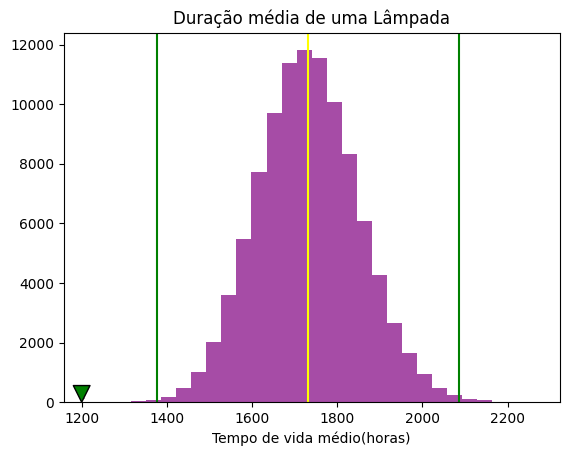

In [47]:
plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de vida médio(horas)')
plt.axvline(media_das_medias, color='yellow')
plt.axvline(media_das_medias + 3*EP, color='green')
plt.axvline(media_das_medias - 3*EP, color='green')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
             arrowprops=dict(facecolor='green'))

plt.show()


In [48]:
qtd_obs = duracao_amostras[(duracao_amostras > media_das_medias - 3*EP) &
                 (duracao_amostras > media_das_medias + 3*EP)]

In [49]:
dados_vida_lampada

confiaca = 0.95

In [50]:
media = dados_vida_lampada['duracao'].mean()
desvio_padrao_amostra = dados_vida_lampada['duracao'].std()
tamanho_amostra = len(dados_vida_lampada)

In [51]:
intervalo_confianca = sc.stats.norm.interval(confiaca,
                                          loc = media,
                                          scale = desvio_padrao_amostra/np.sqrt(tamanho_amostra)
)

In [52]:

print("IC (95%):", intervalo_confianca)

IC (95%): (np.float64(1658.3741665835487), np.float64(1805.2330393004518))


In [53]:
hipotese = 1570
lampadas_natalinas = pd.read_csv("../files/experimento_lampadas_natalinas.csv")
lampadas_natalinas['duracao'].mean()


np.float64(1529.5081310675512)

In [54]:
confianca = 0.95
desvio_padrao_populacional = 105
tamanho_amostra = len(lampadas_natalinas['duracao'])

In [55]:
intervalo = sc.stats.norm.interval(confiaca, 
                                   loc=1570,
                                   scale=desvio_padrao_populacional/np.sqrt(tamanho_amostra))

In [56]:
print('IC (95%):', intervalo)

IC (95%): (np.float64(1549.4203781623294), np.float64(1590.5796218376706))


In [57]:
stats, p_valor = sm.ztest(x1 = lampadas_natalinas['duracao'], value = 1570, alternative = "two-sided")


In [58]:

if p_valor < 0.05:
    conclusao = "Rejeitar a hipótese nula"
else:
    conclusao = "Não rejeita a hipótese nula"


print("Conclusão:", conclusao)

Conclusão: Rejeitar a hipótese nula


In [59]:
tempo_resposta = [28, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 24, 29, 30]

In [60]:
np.mean(tempo_resposta)

np.float64(29.96)

In [61]:
stats, p_valor = sc.stats.ttest_1samp(tempo_resposta, 30, alternative= "less")

In [62]:
nivel_significancia = 0.05


if p_valor < nivel_significancia:
    conclusao = "Rejeitar a hipótese nula"
else:
    conclusao = "Não rejeita a hipótese nula"


conclusao

'Não rejeita a hipótese nula'

In [63]:
vendas_com_propaganda = [329.80, 291.70, 338.86, 391.38, 285.95, 285.95, 394.75, 346.05, 271.83, 332.55, 272.19, 272.06, 314.52, 185.20, 196.50, 266.26, 239.23, 318.85, 245.52, 215.26, 387.94, 286.45, 304.05, 214.52, 267.34, 306.66, 230.94, 322.54, 263.96, 282.50, 263.90, 411.14, 299.19, 236.54, 349.35, 226.75, 312.53, 182.42, 220.31, 311.81, 344.31, 310.28, 293.66, 281.93, 211.29, 256.81, 272.36, 363.43, 320.62, 194.22]

In [64]:
vendas_sem_propaganda = [304.44, 261.89, 244.38, 321.70, 346.86, 348.08, 234.65, 266.45, 304.88, 343.53, 256.25, 273.86, 218.62, 213.23, 333.75, 366.37, 280.68, 345.21, 306.70, 246.29, 306.68, 377.28, 282.85, 378.88, 127.82, 334.31, 290.22, 267.06, 290.51, 165.74, 271.82, 306.43, 373.67, 253.90, 236.49, 254.89, 339.92, 304.73, 253.21, 315.80, 292.80, 343.12, 242.88, 265.34, 261.47, 197.19, 302.77, 300.66, 285.31, 270.92]

In [65]:
print(np.mean(vendas_com_propaganda))

print(np.mean(vendas_sem_propaganda))

286.4832
286.2498


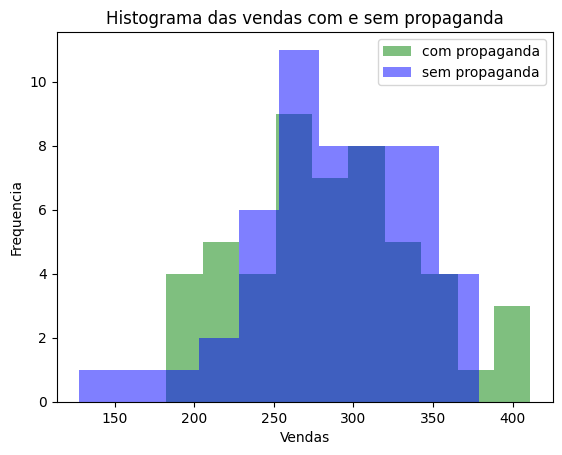

In [66]:
plt.hist(vendas_com_propaganda, color="green", alpha= 0.5, label="com propaganda")
plt.hist(vendas_sem_propaganda, color="blue", alpha= 0.5, label="sem propaganda")

plt.xlabel('Vendas')
plt.ylabel('Frequencia')
plt.title('Histograma das vendas com e sem propaganda')
plt.legend()
plt.show()

In [69]:
stats, p_valor = sc.stats.ttest_ind(vendas_com_propaganda, vendas_sem_propaganda, alternative = "greater")

In [70]:
print(p_valor)

0.49145652153110797


In [71]:
antes_do_treinamento =[78, 65, 75, 80, 85, 88, 79, 81, 76, 84]
apos_o_treinamento = [85, 70, 75, 87, 90, 92, 84, 82, 76, 91]

In [72]:
resultado_sub = [b - a for a, b in zip(antes_do_treinamento, apos_o_treinamento)]

In [73]:
resultado_sub

[7, 5, 0, 7, 5, 4, 5, 1, 0, 7]

In [74]:
stats, p_valor = sc.stats.ttest_rel(apos_o_treinamento, antes_do_treinamento, alternative="greater")

In [76]:
print(p_valor)

0.0006277441617723938


In [77]:
treino_a = [5, 3, 8, 4, 6]
treino_b = [4, 2, 7, 5, 3]

In [78]:
stats, p_valor = sc.stats.mannwhitneyu(treino_a, treino_b, alternative="two-sided")

In [80]:
print(p_valor)

0.4605966187047713


In [81]:
preferencias_antes = [4, 2, 5, 2, 5, 6, 7, 8, 9, 10 ]
preferencias_depois = [8, 5, 3, 5, 8, 9, 9, 9, 10, 9]

In [82]:
resultado_subtracao = [b - a for a, b in zip(preferencias_antes, preferencias_depois)]

In [83]:
resultado_subtracao

[4, 3, -2, 3, 3, 3, 2, 1, 1, -1]

In [86]:
np.mean(resultado_subtracao)

np.float64(1.7)

In [88]:
np.median(resultado_subtracao)

np.float64(2.5)

In [90]:
stats, p_valor = sc.stats.wilcoxon(preferencias_depois, preferencias_antes, alternative="greater")

In [91]:
p_valor

np.float64(0.0185546875)

In [92]:
nivel_significancia=0.05

if p_valor < nivel_significancia:
    conclusao = "Rejeitar a hipótese nula"
else:
    conclusao = "Não rejeita a hipótese nula"
conclusao

'Rejeitar a hipótese nula'